In [1]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [29]:
data = parallel_rw_pkl(None, 'Munic0130_atm', 'r')
lat, lon =48.14778,11.572778
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

6406 9136


TypeError: 'NoneType' object is not iterable

6406 9136
0.00115353902209


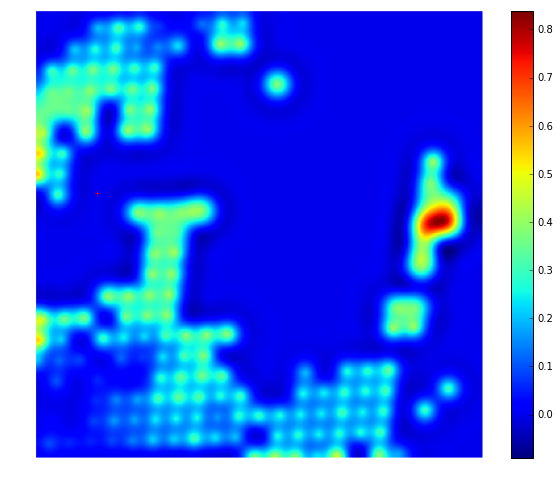

In [10]:
data = parallel_rw_pkl(None, 'Munic0212_atm', 'r')
lat, lon =48.14778,11.572778
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [14]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160101_160430_Munich_University.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][13:15]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
13,12:02:2016,11:30:28,43.479491,NaN,0.024171,0.023137,0.030179,NaN,NaN,NaN,NaN,NaN,0.044671,NaN,NaN,0.061783,NaN,0.070124,0.060566,0.592472
14,12:02:2016,12:30:27,43.521146,NaN,0.020747,0.019613,0.025747,NaN,NaN,NaN,NaN,NaN,0.037595,NaN,NaN,0.052172,NaN,0.057540,0.047484,0.538966


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


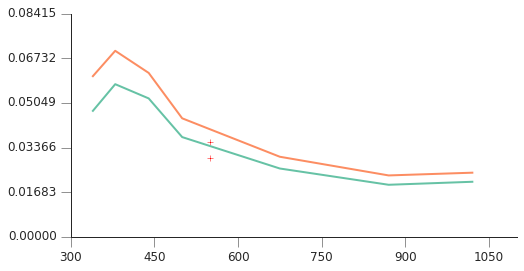

In [15]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [17]:
np.mean(aot550)

0.032703702932893736

In [18]:
0.00115353902209,0.032703702932893736

0.032703702932893736

6406 9136
-0.00409594374661


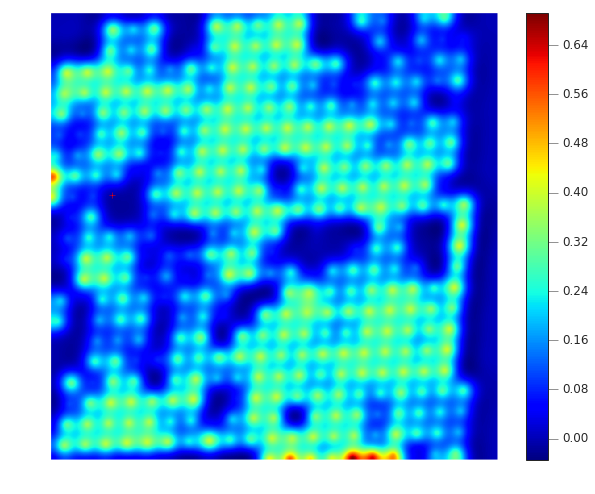

In [19]:
data = parallel_rw_pkl(None, 'Munic0429_atm', 'r')
lat, lon =48.14778,11.572778
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [21]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160101_160430_Munich_University.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][89:96]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
89,29:04:2016,07:46:57,120.324271,NaN,0.037521,0.040341,0.060404,NaN,NaN,NaN,NaN,NaN,0.099654,NaN,NaN,0.134340,NaN,0.166692,0.171793,0.773488
90,29:04:2016,09:13:12,120.384167,NaN,0.039707,0.041943,0.061760,NaN,NaN,NaN,NaN,NaN,0.097033,NaN,NaN,0.126075,NaN,0.156334,0.154581,0.765839
91,29:04:2016,10:13:10,120.425810,NaN,0.041023,0.044059,0.067556,NaN,NaN,NaN,NaN,NaN,0.106468,NaN,NaN,0.138024,NaN,0.171453,0.170661,0.790784
92,29:04:2016,12:13:10,120.509144,NaN,0.039173,0.044367,0.066350,NaN,NaN,NaN,NaN,NaN,0.108693,NaN,NaN,0.139342,NaN,0.177893,0.180402,0.824646
93,29:04:2016,14:39:07,120.610498,NaN,0.039046,0.045571,0.069237,NaN,NaN,NaN,NaN,NaN,0.117450,NaN,NaN,0.148958,NaN,0.192822,0.203776,0.874537
94,29:04:2016,15:16:48,120.636667,NaN,0.035559,0.041892,0.064219,NaN,NaN,NaN,NaN,NaN,0.108851,NaN,NaN,0.139809,NaN,0.179041,0.190767,0.853789
95,29:04:2016,16:50:53,120.702002,NaN,0.036524,0.044650,0.067966,NaN,NaN,NaN,NaN,NaN,0.120510,NaN,NaN,0.153579,NaN,0.196308,0.215104,0.845976


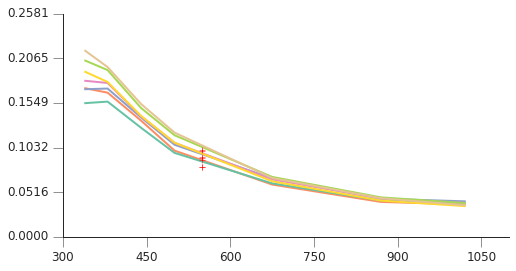

In [22]:
aot550 = []
plot_config()
#dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [27]:
np.mean(aot550[2:4])

0.090529945946889956

In [24]:
np.mean(aerosols[2])

0.15025660717368844

In [ ]:
0.15025660717368844, 0.090529945946889956

In [ ]:
0.00115353902209,0.032703702932893736
0.15025660717368844, 0.090529945946889956